In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.lines as mlines

import os, sys

from datetime import datetime as dt
import math

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (21, 12)
plt.rcParams['font.family'] = 'sans-serif'

import seaborn as sns  # type: ignore
sns.set(style="whitegrid")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [154]:
obs_q_f = r'C:\dev\05_geodata\articles\balaji_global_soils_eval\porijogi\data\flow\Reola_observed_flow.xlsx'

df = pd.read_excel(obs_q_f, infer_datetime_format=True, parse_dates=[0])
df_q = df.set_index('Date')

In [155]:
df_q = df_q.loc[df_q.index >= dt.strptime("2003-01-01","%Y-%m-%d")]
df_q = df_q.loc[df_q.index <= dt.strptime("2013-12-31","%Y-%m-%d")]

In [156]:
df_q_monthly = df_q.resample('M').mean()
df_q_monthly['month'] = df_q_monthly.index.month
df_q_monthly.groupby('month')['Flow'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,11.0,1.909226,1.197131,0.513871,1.043548,1.708419,2.390403,4.595161
2,11.0,1.184263,0.563716,0.462143,0.757321,1.170345,1.340714,2.454483
3,11.0,2.189915,1.016435,0.890710,1.364516,1.966774,3.180790,3.606452
4,11.0,4.506615,2.272609,1.744667,3.163000,3.500667,6.149217,9.115667
5,11.0,1.734724,0.622145,0.979355,1.149194,1.710645,2.174516,2.934839
6,11.0,1.330415,0.874649,0.582000,0.672500,1.247667,1.517983,3.332333
7,11.0,0.843601,0.527405,0.263871,0.505532,0.595161,1.083274,2.001935
8,11.0,0.846073,0.375299,0.401290,0.529032,0.857097,1.098903,1.590645
9,11.0,1.080633,0.617365,0.433667,0.556833,0.977633,1.556000,2.111333


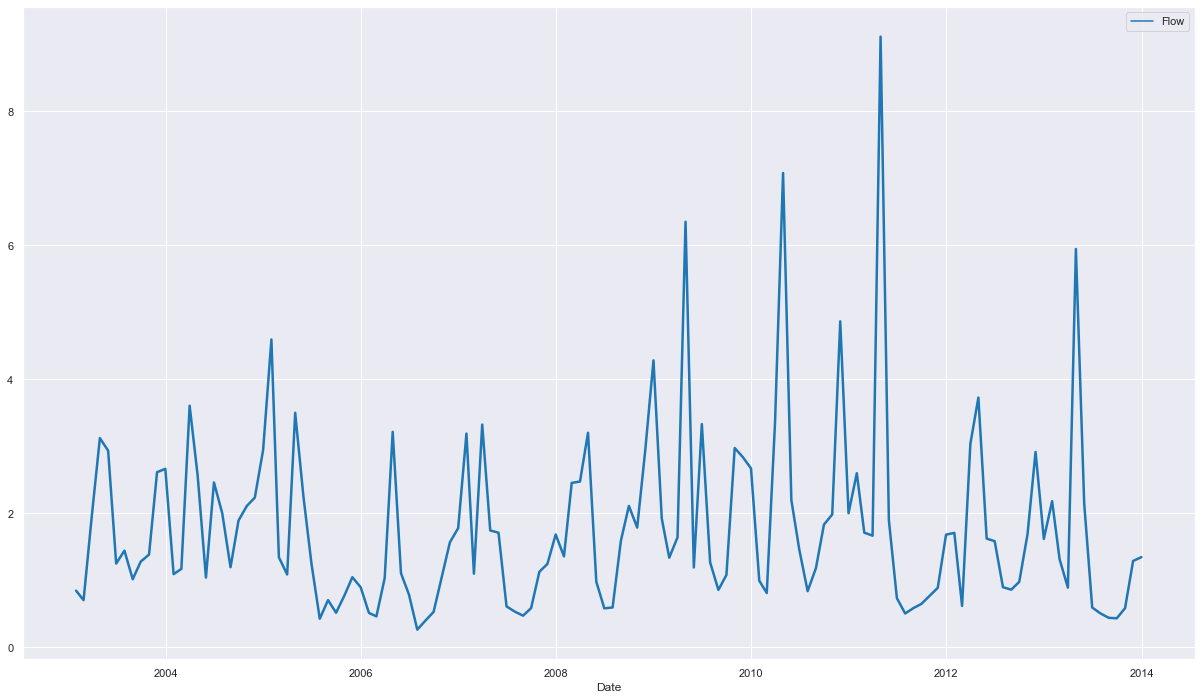

In [157]:
sns.lineplot(data=df_q_monthly[['Flow']], palette="tab10", linewidth=2.5)

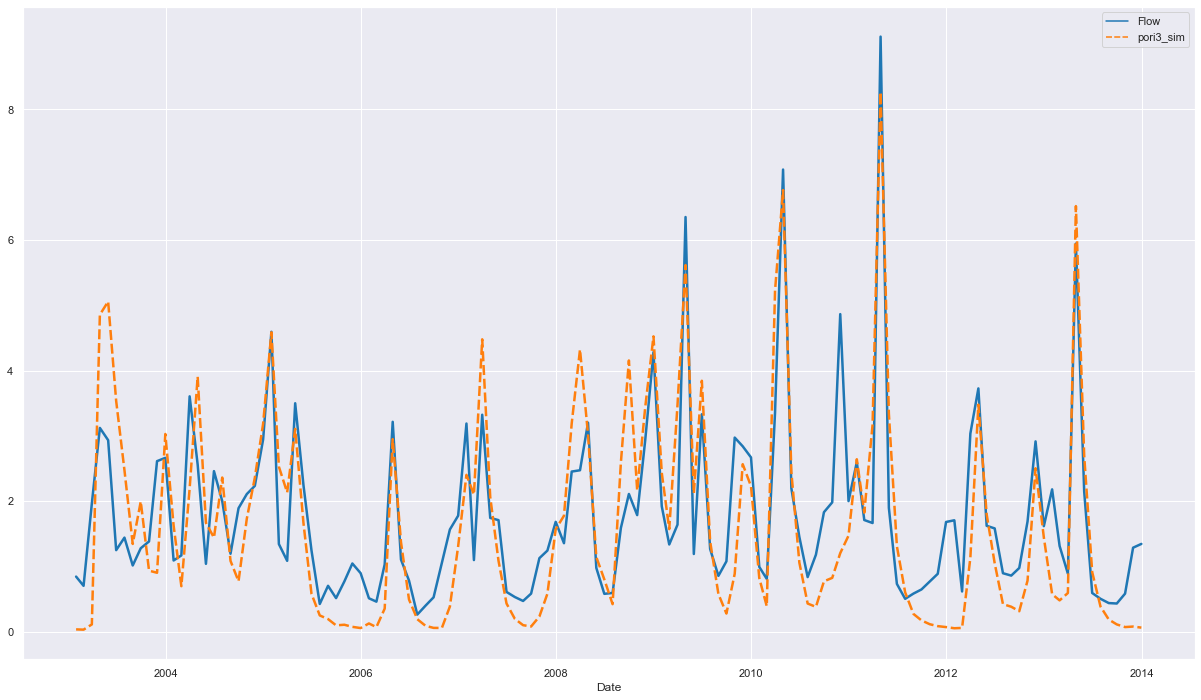

In [158]:
arr = np.genfromtxt(r"C:\dev\05_geodata\articles\balaji_global_soils_eval\balaji_soils_to_test\swatcup_uc_2000_2\Pori3_sim2.Sufi2.SwatCup\Iterations\NS_uc_2000\Sufi2.Out\best_sim.txt", skip_header=3)
alex_sim = pd.DataFrame(arr)
df_q_monthly['pori3_sim'] = alex_sim[1].values


sns.lineplot(data=df_q_monthly[['Flow','pori3_sim']], palette="tab10", linewidth=2.5)

In [240]:
precip = pd.read_csv(r"c:/dev/05_geodata/articles/balaji_global_soils_eval/porijogi/data/climate/tartu_tora_pcp.csv", infer_datetime_format=True, parse_dates=[0])
precip = precip.rename(columns={'1957-01-01': 'date','0.0':'rainfall'})
precip_d = precip.set_index('date')

precip_d = precip_d.loc[precip_d.index >= dt.strptime("2003-01-01","%Y-%m-%d")]
precip_d = precip_d.loc[precip_d.index <= dt.strptime("2013-12-31","%Y-%m-%d")]

# 05_geodata/articles/balaji_global_soils_eval/porijogi/data/climate/tartu_tora_2000_tmp.csv
display(precip_d.head())

precip_monthly = precip_d.resample('M').sum()
precip_monthly['month'] = precip_monthly.index.month
display(precip_monthly.groupby('month')['rainfall'].describe())

,rainfall
date,
2003-01-01,11.6
2003-01-02,3.2
2003-01-03,0.7
2003-01-04,0.3
2003-01-05,1.0


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,11.0,52.090909,26.524044,22.1,27.00,47.4,68.50,101.5
2,11.0,31.900000,10.596886,14.5,25.85,31.2,36.60,56.0
3,11.0,36.781818,15.693618,17.6,24.05,33.5,46.45,67.9
4,11.0,25.681818,13.554912,6.4,16.25,24.3,34.40,51.1
5,11.0,62.427273,32.544403,15.6,40.05,59.9,84.90,116.6
6,11.0,81.272727,43.950178,35.0,46.45,73.8,96.10,162.3
7,11.0,63.600000,25.045319,24.2,51.15,66.3,70.95,111.6
8,11.0,98.963636,47.173473,48.3,68.80,81.7,108.95,203.6
9,11.0,52.136364,27.678449,14.3,35.00,49.8,58.90,106.4


In [241]:
import importlib as ipl

import os
from pathlib import Path
import uuid
import shutil
import sys
import traceback

import spotpy

import pyswat
ipl.reload(pyswat)

from pyswat import SimManage, ReadOut, FileEdit

the_model = SimManage.SwatModel.initFromTxtInOut(
        txtInOut=r"C:\dev\05_geodata\articles\swatp_sensitvity_porijogi\models\swat1\Scenarios\sim1\TxtInOut",
        copy=False,
        force=True
    )

reader1 = ReadOut.rchOutputManipulator(["FLOW_OUT"], [1], "skip", True, 0, the_model.working_dir, iprint='month', stats_dir=r"C:\temp")
sim_flow_1 = reader1.outValues["FLOW_OUT"][1]

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
model text encoding unlikely, assuming latin-1
swat_64rel.exe not in default paths


C:\dev\conda3\envs\daskgeo2020a\lib\site-packages\matplotlib\axes\_axes.py:2179: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  dx = [convert(x0 + ddx) - x for ddx in dx]


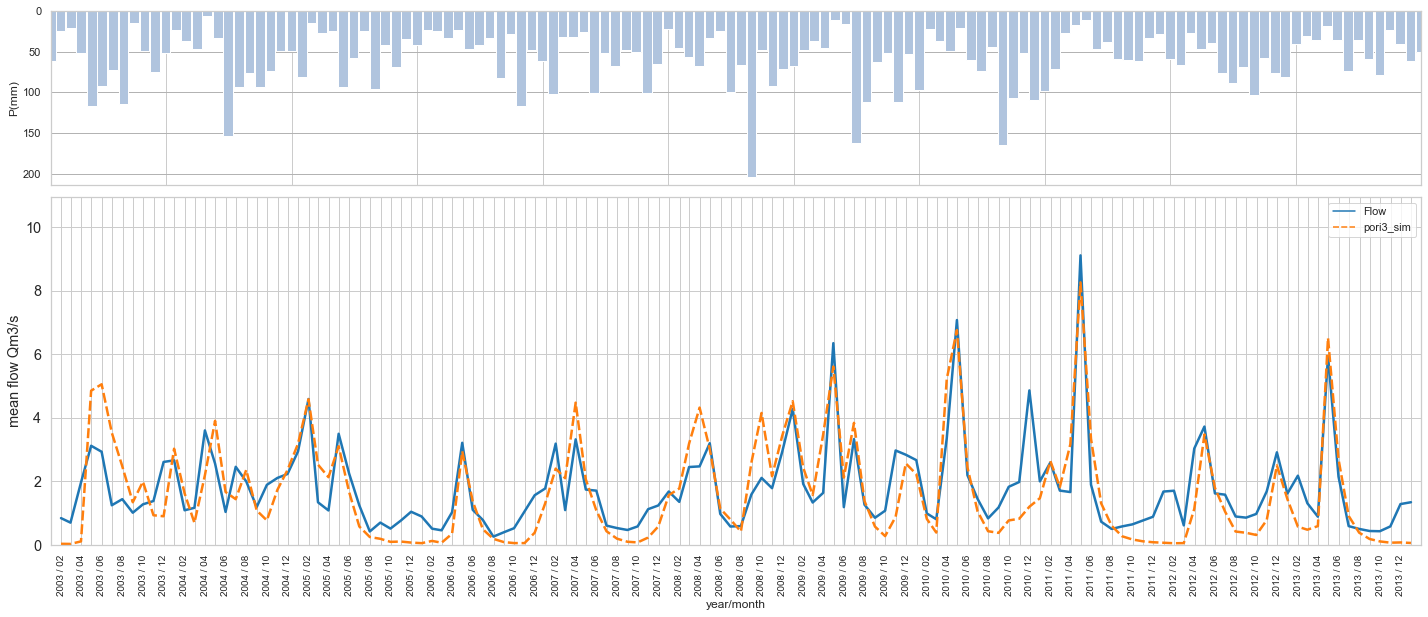

In [242]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.dates as dates
import matplotlib.dates as dates
import matplotlib.ticker as ticker

df_q_monthly['sim_flow_1'] = np.array(sim_flow_1)

# display(df_q_monthly.head(5))

plt.figure(figsize=(20,9))

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

# df_q_monthly.index,precip_monthly['rainfall'].values,df_q_monthly['sim_flow_1']
# sP = precip_monthly['rainfall'].values
# t = df_q_monthly.index

df_q_monthly['rainfall'] = precip_monthly['rainfall'].values
# PRECIPITATION/HYETOGRAPH CHART
ax2 = plt.subplot(gs[0])

ax2.bar(t, sP, 1, color='#b0c4de')
ax2.xaxis.grid(b=True, which='minor', color='.7', linestyle='-')
ax2.yaxis.grid(b=True, which='major', color='0.7', linestyle='-')
ax2.set_ylabel('P(mm)')
ax2.set_xlim(min(t), max(t))
plt.setp(ax2.get_xticklabels(), visible=False)

ax2.invert_yaxis()


# HYDROGRAM CHART
ax = plt.subplot(gs[1])

sns.lineplot(data=df_q_monthly[['Flow','pori3_sim']], palette="tab10", linewidth=2.5, ax=ax)

# sns.lineplot(data=df_q_monthly['sim_flow_1'], palette="tab10", linewidth=2.5)

ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=1))

ax.xaxis.set_major_formatter(dates.DateFormatter('%Y / %m'))

ax.set_xlim(min(df_q_monthly.index) - np.timedelta64(1, 'M'), max(df_q_monthly.index) + np.timedelta64(1, 'M'))
ax.set_ylim(0, df_q_monthly[['Flow','pori3_sim']].values.max()*1.2)

ax.grid(True, which='minor')

plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='small', 
)

plt.xlabel('year/month', fontsize='medium')

plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
)
plt.ylabel('mean flow Qm3/s', fontsize='large')
# gs.title("pori flows", fontsize='x-large')

plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)

plt.show()


In [243]:
from sklearn.metrics import r2_score, mean_squared_error


display(r2_score(df_q_monthly['Flow'], df_q_monthly['pori3_sim']))
display(mean_squared_error(df_q_monthly['Flow'], df_q_monthly['pori3_sim']))
display(np.sqrt(mean_squared_error(df_q_monthly['Flow'], df_q_monthly['pori3_sim'])))

import spotpy

display(spotpy.objectivefunctions.nashsutcliffe(df_q_monthly['Flow'], df_q_monthly['pori3_sim']))
display(spotpy.objectivefunctions.kge(df_q_monthly['Flow'], df_q_monthly['pori3_sim']))
display(spotpy.objectivefunctions.pbias(df_q_monthly['Flow'], df_q_monthly['pori3_sim']))
display(spotpy.objectivefunctions.rsquared(df_q_monthly['Flow'], df_q_monthly['pori3_sim']))

0.5436823335391932

0.8506608885045926

0.9223127932022805

0.5436823335391932

0.7302945136043353

-9.381791365138609

0.6864645560467274

In [184]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.dates as dates
import numpy as np

def plotHH(t,sP,sQ):
    fig = plt.figure()
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
    
    # HYDROGRAM CHART
    ax = plt.subplot(gs[1])
    ax.plot(t,sQ)
    ax.set_ylabel(u'Q(m³/s)', color='b')
    ax.set_xlabel('Time (min.)')
    ax.tick_params(axis='y', colors='b')
    ax.xaxis.grid(b=True, which='minor', color='.7', linestyle='-')
    ax.yaxis.grid(b=True, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))
    ax.set_ylim(0, max(sQ)*1.2)
    
    ax.xaxis.set_minor_locator(dates.MonthLocator(interval=1))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%m'))

    # PRECIPITATION/HYETOGRAPH CHART
    ax2 = plt.subplot(gs[0])
    ax2.bar(t, sP, 1, color='#b0c4de')
    ax2.xaxis.grid(b=True, which='minor', color='.7', linestyle='-')
    ax2.yaxis.grid(b=True, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('P(mm)')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)
    
    plt.tight_layout()
    ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.show()
    #plt.savefig(filename,format='pdf')
    plt.close(fig)

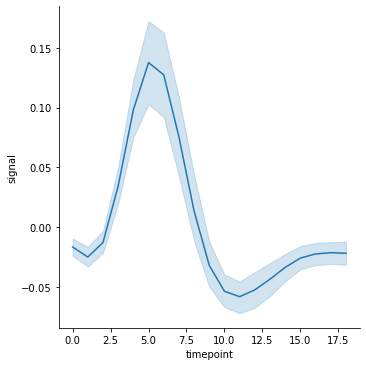

In [1]:
import seaborn as sns

fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

In [2]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
